¡Hola,Monica!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hola Monica, excelente trabajo! Tu código es correcto y ordenado. Resumes de muy buena forma los resultados y además tuviste decisiones muy acertadas durante el proyecto, como el filtrado de datos. Solo te dejé una recomendación que puedes aplicar en futuros proyectos, la cual es un uso más frecuente de visualizaciones para explicar tus resultados más importantes, aquellos que consideres que son de suma importancia mostrar a tus jefes o líderes de proyecto. Continúa esforzándote, saludos!
</div>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
from scipy import stats as st
import numpy as np
import math as mth

In [2]:
data = pd.read_csv('/datasets/logs_exp_us.csv', sep = "\t")
data = data.rename(columns = {'EventName':'nombre_evento' , 
                              'DeviceIDHash':'id_usuario', 
                              'EventTimestamp':'fecha_hora',
                              'ExpId':'id_exp'})
data.drop_duplicates().head()

,nombre_evento,id_usuario,fecha_hora,id_exp
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [3]:
data['id_usuario'] = data['id_usuario'].astype('str')
data['id_exp'] = data['id_exp'].astype('str')
data['fecha_hora'] = pd.to_datetime(data['fecha_hora'], unit='s')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   nombre_evento  244126 non-null  object        
 1   id_usuario     244126 non-null  object        
 2   fecha_hora     244126 non-null  datetime64[ns]
 3   id_exp         244126 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 7.5+ MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo cargando tanto las librerías necesarias para el proyecto como el dataset con el separador adecuado. Además, la exploración inicial usando los métodos info()  para mostrar los datos con los que vamos a trabajar
</div>

In [4]:
data.isna().sum()

nombre_evento    0
id_usuario       0
fecha_hora       0
id_exp           0
dtype: int64

In [5]:
data['fecha'] = data['fecha_hora'].dt.date     
data['hora']  = data['fecha_hora'].dt.time 
data.head()

,nombre_evento,id_usuario,fecha_hora,id_exp,fecha,hora
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,04:43:36
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,11:11:42
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,11:48:42


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien! Transformaste el tipo de algunas variables a uno más adecuado para su manejo, específicamente las variables de fechas, las cuales con su tipo actual tienen mucho más métodos que facilitarán el desarrollo del proyecto. 
</div>

In [6]:
print(f"Hay {len(data)} eventos registrados")

Hay 244126 eventos registrados


In [7]:
no_usuarios = data['id_usuario'].nunique()
print(f"Hay {no_usuarios} usuarios en los registros")

Hay 7551 usuarios en los registros


In [8]:
eventos_por_usuario = data.groupby('id_usuario')['nombre_evento'].count().rename('no_eventos').reset_index()
print(f"Hay un promedio de {eventos_por_usuario['no_eventos'].mean().round(1)} eventos por usuario")
print(f"Hay una mediana de {eventos_por_usuario['no_eventos'].median()} eventos por usuario")
print(f"Hay una moda de {eventos_por_usuario['no_eventos'].mode().iloc[0]} eventos por usuario")

Hay un promedio de 32.3 eventos por usuario
Hay una mediana de 20.0 eventos por usuario
Hay una moda de 5 eventos por usuario


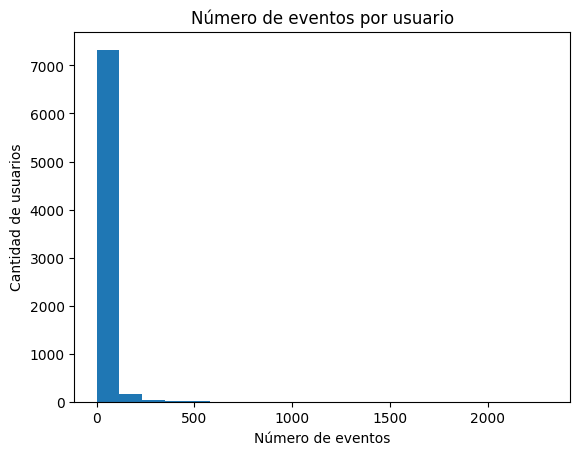

In [9]:
eventos_por_usuario['no_eventos'].plot(kind='hist', bins=20)
plt.xlabel('Número de eventos')
plt.ylabel('Cantidad de usuarios')
plt.title('Número de eventos por usuario')
plt.show()

Como podemos ver el promedio de eventos por usuario se ve alterado ya que hay unos pocos usuarios con una cantidad de eventos muy grande pero en su mayoría los ususrios tienen 5 eventos.

In [10]:
print(f"Los datos van del {data['fecha'].min()} al {data['fecha'].max()}. " 
      f"Por lo que cubren un periodo de {(data['fecha'].max() - data['fecha'].min()).days} días")

Los datos van del 2019-07-25 al 2019-08-07. Por lo que cubren un periodo de 13 días


In [11]:
eventos_por_dia =  data.groupby('fecha')['nombre_evento'].count().rename('no_eventos').reset_index()
eventos_por_dia

,fecha,no_eventos
0,2019-07-25,9
1,2019-07-26,31
2,2019-07-27,55
3,2019-07-28,105
4,2019-07-29,184
5,2019-07-30,413
6,2019-07-31,2031
7,2019-08-01,36229
8,2019-08-02,35606
9,2019-08-03,33351


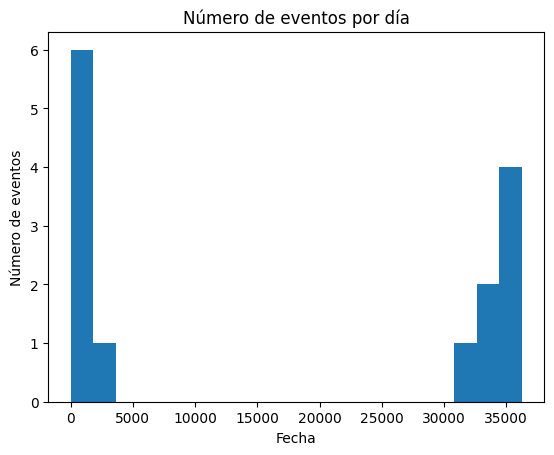

In [12]:
eventos_por_dia['no_eventos'].plot(kind='hist', bins=20)
plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.title('Número de eventos por día')
plt.show()

Pdemos ver que hay algunos días en los que se registraron muy pocos eventos y otros en los que se registraron más. Viendo las fechas nos damos cuenta que los días de pocos eventos son del periodo del 2019-07-25 al 2019-07-31. Esto podría sesgar el panorama por lo que tomaremos en cuenta solo los datos del 2019-08-01 al 2019-08-07	

In [13]:
data['fecha'] = pd.to_datetime(data['fecha'])
datos_agosto = data[data['fecha'] >= '2019-08-01']
datos_agosto.head()

,nombre_evento,id_usuario,fecha_hora,id_exp,fecha,hora
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01,00:07:28
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01,00:08:00
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01,00:08:55
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01,00:08:58
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01,00:08:59


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo tanto graficando la distribución de los eventos como de tu decisión de hacer el filtrado de datos. Tal como dices, los datos antes del 1 de agosto del 2019 parecen estar incompletos, lo cual los hace muy poco útiles para el análisis de embudo e incluso podrían conducir a interpretaciones imprecisas.
</div>

In [14]:
print(f"De {len(data)} eventos registrados, ahora tenemos {len(datos_agosto)}."
     f"Perdimos un {round(100 - (len(datos_agosto)*100/len(data)), 1)}%")

De 244126 eventos registrados, ahora tenemos 241298.Perdimos un 1.2%


In [15]:
no_usuarios_agosto = datos_agosto['id_usuario'].nunique()
print(f"De {no_usuarios} usuarios registrados, ahora tenemos {no_usuarios_agosto}."
     f"Perdimos un {round(100 - (no_usuarios_agosto*100/no_usuarios), 1)}%")

De 7551 usuarios registrados, ahora tenemos 7534.Perdimos un 0.2%


In [16]:
usuarios_por_exp = (datos_agosto.groupby('id_exp')['id_usuario']
                    .count()
                    .rename('no_usuarios')
                    .reset_index())
usuarios_por_exp

,id_exp,no_usuarios
0,246,79425
1,247,77147
2,248,84726


La infomación que se perdió fue mínima y aun tenemos usuarios suficientes en los tres grupos experimentales

In [17]:
usuarios_por_evento = (
    datos_agosto.groupby('nombre_evento')['id_usuario']
        .nunique()
        .rename('usuarios')
        .reset_index()
        .sort_values('usuarios')
)
usuarios_por_evento

,nombre_evento,usuarios
4,Tutorial,840
3,PaymentScreenSuccessful,3539
0,CartScreenAppear,3734
2,OffersScreenAppear,4593
1,MainScreenAppear,7419


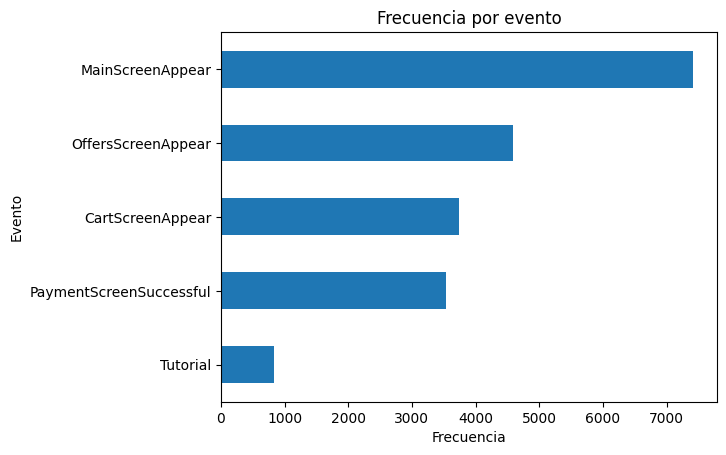

In [18]:
usuarios_por_evento.plot(kind='barh', x ='nombre_evento', legend=False)
plt.xlabel('Frecuencia')
plt.ylabel('Evento')
plt.title('Frecuencia por evento') 
plt.show()

In [19]:
usuarios_por_evento['proporcion'] = ((usuarios_por_evento['usuarios'] / 
                                      no_usuarios_agosto) * 100).round(2)
usuarios_por_evento = usuarios_por_evento.sort_values('usuarios', ascending = False)
usuarios_por_evento

,nombre_evento,usuarios,proporcion
1,MainScreenAppear,7419,98.47
2,OffersScreenAppear,4593,60.96
0,CartScreenAppear,3734,49.56
3,PaymentScreenSuccessful,3539,46.97
4,Tutorial,840,11.15


La proporcion de 'MainScreenAppear' no es del 100% por lo que la gente podría llegar a la etapa de 'OffersScreenAppear' mediante un link directo. La proporcion de 'Tutorial' es muy baja y no tendría sentido que alguien lo tome al final así que no podría ser parte de la secuencia. En cuanto a 'OffersScreenAppear' → 'CartScreenAppear' → 'PaymentScreenSuccessfu', estos probablemente si van en secuancia en ese mismo orden.

In [20]:
usuarios_por_evento['proporcion_embudo'] = (usuarios_por_evento['usuarios']
    .div(usuarios_por_evento['usuarios'].shift(1))
    .mul(100)
    .round(2))

print(usuarios_por_evento)

             nombre_evento  usuarios  proporcion  proporcion_embudo
1         MainScreenAppear      7419       98.47                NaN
2       OffersScreenAppear      4593       60.96              61.91
0         CartScreenAppear      3734       49.56              81.30
3  PaymentScreenSuccessful      3539       46.97              94.78
4                 Tutorial       840       11.15              23.74


Según los resultados en la etapa en la que se pierden más usarios es en la de tutorial, pero como probablemente no es parte de la secuancia diremos que es en la etapa de 'OffersScreenAppear' esto se podría deber a que los usuarios no encontraron un producto que les interesara.

Vamos a calcualar el prcentaje de los usuarios que hicieron todos los pasos sin contar el tutorial ya que probablemente no es parte de la secuancia.

In [ ]:
eventos = ['MainScreenAppear',
           'OffersScreenAppear', 
           'CartScreenAppear', 
           'PaymentScreenSuccessful']


usuarios_completos = set(datos_agosto.loc[datos_agosto['nombre_evento']==eventos[0], 'id_usuario'])

for evento in eventos[1:]:
    usuarios_completos &= set(datos_agosto.loc[datos_agosto['nombre_evento']==evento, 'id_usuario'])

tasa_final = len(usuarios_completos) / len(
    set(datos_agosto.loc[datos_agosto['nombre_evento']==eventos[0], 'id_usuario'])
) * 100
print(f"Un {tasa_final:.2f}% de los usuarios hace todo el viaje desde el primer evento hasta el pago")

In [ ]:
usuarios_por_exp

In [ ]:
no_usuarios_246 = datos_agosto[datos_agosto['id_exp'] == '246']['id_usuario'].nunique()
no_clientes_246 =  datos_agosto[
                   (datos_agosto['id_exp'] == '246') &
                   (datos_agosto['nombre_evento'] == 'PaymentScreenSuccessful')
                    ]['id_usuario'].nunique()

no_usuarios_247 = datos_agosto[datos_agosto['id_exp'] == '247']['id_usuario'].nunique()
no_clientes_247 =  datos_agosto[
                   (datos_agosto['id_exp'] == '247') &
                   (datos_agosto['nombre_evento'] == 'PaymentScreenSuccessful')
                    ]['id_usuario'].nunique()

no_usuarios_248 = datos_agosto[datos_agosto['id_exp'] == '248']['id_usuario'].nunique()
no_clientes_248 =  datos_agosto[
                   (datos_agosto['id_exp'] == '248') &
                   (datos_agosto['nombre_evento'] == 'PaymentScreenSuccessful')
                    ]['id_usuario'].nunique()

In [ ]:
proporcion_246 = no_clientes_246 / no_usuarios_246

proporcion_247 = no_clientes_247 / no_usuarios_247

In [ ]:
proporcion_a_a = (no_clientes_246 + no_clientes_247) / (no_usuarios_246 + no_usuarios_247)

diferencia = proporcion_246 - proporcion_247

valor_z = diferencia / mth.sqrt(proporcion_a_a * 
        (1 - proporcion_a_a) * (1/no_usuarios_246 + 1/no_usuarios_247))

distr = st.norm(0, 1) 

alpha = .05

valor_p = (1 - distr.cdf(abs(valor_z))) * 2

print('Valor p: ', valor_p)

if (valor_p < alpha):
    print("Rechazar la hipótesis nula: hay una diferencia significativa entre 246 y 247")
else:
    print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de 246 y 247 son diferentes")

In [ ]:
usuario_evento_246 = (datos_agosto[datos_agosto['id_exp'] == '246']
                    .groupby('nombre_evento')['id_usuario']
                    .nunique()
                    .rename('no_usuarios')
                    .reset_index()
                    .sort_values('no_usuarios', ascending = False))
usuario_evento_246

In [ ]:
usuario_evento_247 = (datos_agosto[datos_agosto['id_exp'] == '247']
                    .groupby('nombre_evento')['id_usuario']
                    .nunique()
                    .rename('no_usuarios')
                    .reset_index()
                    .sort_values('no_usuarios', ascending = False))
usuario_evento_247

El evento más popular tanto para el experimento 246 como el 247 es 'MainScreenAppear'

In [ ]:
usuario_evento_248 = (datos_agosto[datos_agosto['id_exp'] == '248']
                    .groupby('nombre_evento')['id_usuario']
                    .nunique()
                    .rename('no_usuarios')
                    .reset_index()
                    .sort_values('no_usuarios', ascending = False))
usuario_evento_248

**246/247**

In [ ]:
def proporcion_evento(tabla_exp, evento, usuarios_exp):
    usuarios_evento = tabla_exp[tabla_exp['nombre_evento'] == evento]['no_usuarios'].iloc[0]

    proporcion = (usuarios_evento / usuarios_exp * 100).round(2)

    return proporcion

In [ ]:
MainScreenAppear_246 = proporcion_evento(usuario_evento_246, 
                                         'MainScreenAppear', 
                                         no_usuarios_246)
OffersScreenAppear_246 = proporcion_evento(usuario_evento_246, 
                                           'OffersScreenAppear', 
                                           no_usuarios_246)
CartScreenAppear_246 = proporcion_evento(usuario_evento_246, 
                                         'CartScreenAppear', 
                                         no_usuarios_246)
PaymentScreenSuccessful_246 = proporcion_evento(usuario_evento_246, 
                                                'PaymentScreenSuccessful', 
                                                no_usuarios_246)
Tutorial_246 = proporcion_evento(usuario_evento_246, 
                                 'Tutorial', 
                                 no_usuarios_246)

MainScreenAppear_247 = proporcion_evento(usuario_evento_247, 
                                         'MainScreenAppear', 
                                         no_usuarios_247)
OffersScreenAppear_247 = proporcion_evento(usuario_evento_247, 
                                           'OffersScreenAppear', 
                                           no_usuarios_247)
CartScreenAppear_247 = proporcion_evento(usuario_evento_247, 
                                         'CartScreenAppear', 
                                         no_usuarios_247)
PaymentScreenSuccessful_247 = proporcion_evento(usuario_evento_247, 
                                                'PaymentScreenSuccessful', 
                                                no_usuarios_247)
Tutorial_247 = proporcion_evento(usuario_evento_247, 
                                 'Tutorial', 
                                 no_usuarios_247)

print(f"MainScreenAppear. Exp246: {MainScreenAppear_246}%, Exp247: {MainScreenAppear_247}%")
print(f"OffersScreenAppear. Exp246: {OffersScreenAppear_246}%, Exp247: {OffersScreenAppear_247}%")
print(f"CartScreenAppear. Exp246: {CartScreenAppear_246}%, Exp247: {CartScreenAppear_247}%")
print(f"PaymentScreenSuccessful. Exp246: {PaymentScreenSuccessful_246}%, Exp247: {PaymentScreenSuccessful_247}%")
print(f"Tutorial. Exp246: {Tutorial_246}%, Exp247: {Tutorial_247}%")

In [ ]:
def diferencia_significativa(tabla_exp_1,
                             tabla_exp_2,
                             evento,
                             no_usuarios_1,
                             no_usuarios_2,
                            exp_1,
                            exp_2):
    
    usuarios_evento_1 = tabla_exp_1[tabla_exp_1['nombre_evento'] == evento]['no_usuarios'].iloc[0]
    usuarios_evento_2 = tabla_exp_2[tabla_exp_2['nombre_evento'] == evento]['no_usuarios'].iloc[0]
    
    proporcion_evento_combinada = ((usuarios_evento_1 + usuarios_evento_2) / 
                        (no_usuarios_1 + no_usuarios_2))
    
    proporcion_evento_1 = usuarios_evento_1 / no_usuarios_1
    proporcion_evento_2 = usuarios_evento_2 / no_usuarios_2
    
    diferencia = proporcion_evento_1 - proporcion_evento_2

    valor_z = diferencia / mth.sqrt(proporcion_evento_combinada * 
        (1 - proporcion_evento_combinada) * (1/no_usuarios_1 + 1/no_usuarios_2))

    distr = st.norm(0, 1) 

    alpha = .05

    valor_p = (1 - distr.cdf(abs(valor_z))) * 2

    if (valor_p < alpha):
        return(f"Rechazar la hipótesis nula: hay una diferencia significativa entre el evento '{evento}' de {exp_1} y {exp_2}")
    else:
        return(f"No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones del evento '{evento}' de {exp_1} y {exp_2} son diferentes")

In [ ]:
MainScreenAppear_246_247 = diferencia_significativa(usuario_evento_246,
                                             usuario_evento_247,
                                             'MainScreenAppear',
                                             no_usuarios_246,
                                             no_usuarios_247,
                                            '246',
                                            '247')
print(MainScreenAppear_246_247)

OffersScreenAppear_246_247 = diferencia_significativa(usuario_evento_246,
                                             usuario_evento_247,
                                             'OffersScreenAppear',
                                             no_usuarios_246,
                                             no_usuarios_247,
                                            '246',
                                            '247')
print(OffersScreenAppear_246_247)

CartScreenAppear_246_247 = diferencia_significativa(usuario_evento_246,
                                             usuario_evento_247,
                                             'CartScreenAppear',
                                             no_usuarios_246,
                                             no_usuarios_247,
                                            '246',
                                            '247')
print(CartScreenAppear_246_247)

PaymentScreenSuccessful_246_247 = diferencia_significativa(usuario_evento_246,
                                             usuario_evento_247,
                                             'PaymentScreenSuccessful',
                                             no_usuarios_246,
                                             no_usuarios_247,
                                            '246',
                                            '247')
print(PaymentScreenSuccessful_246_247)

Tutorial_246_247 = diferencia_significativa(usuario_evento_246,
                                             usuario_evento_247,
                                             'Tutorial',
                                             no_usuarios_246,
                                             no_usuarios_247,
                                            '246',
                                            '247')
print(Tutorial_246_247)

Ninguno de los eventos tuvo diferencias significativas por lo que podemos confirmar que los grupos se dividieron correctamente

**246/248**

In [ ]:
MainScreenAppear_246_248 = diferencia_significativa(usuario_evento_246,
                                             usuario_evento_248,
                                             'MainScreenAppear',
                                             no_usuarios_246,
                                             no_usuarios_248,
                                            '246',
                                            '248')
print(MainScreenAppear_246_248)

OffersScreenAppear_246_248 = diferencia_significativa(usuario_evento_246,
                                             usuario_evento_248,
                                             'OffersScreenAppear',
                                             no_usuarios_246,
                                             no_usuarios_248,
                                            '246',
                                            '248')
print(OffersScreenAppear_246_248)

CartScreenAppear_246_248 = diferencia_significativa(usuario_evento_246,
                                             usuario_evento_248,
                                             'CartScreenAppear',
                                             no_usuarios_246,
                                             no_usuarios_248,
                                            '246',
                                            '248')
print(CartScreenAppear_246_248)

PaymentScreenSuccessful_246_248 = diferencia_significativa(usuario_evento_246,
                                             usuario_evento_248,
                                             'PaymentScreenSuccessful',
                                             no_usuarios_246,
                                             no_usuarios_248,
                                            '246',
                                            '248')
print(PaymentScreenSuccessful_246_248)

Tutorial_246_248 = diferencia_significativa(usuario_evento_246,
                                             usuario_evento_248,
                                             'Tutorial',
                                             no_usuarios_246,
                                             no_usuarios_248,
                                            '246',
                                            '248')
print(Tutorial_246_248)

**247/248**

In [ ]:
MainScreenAppear_247_248 = diferencia_significativa(usuario_evento_247,
                                             usuario_evento_248,
                                             'MainScreenAppear',
                                             no_usuarios_247,
                                             no_usuarios_248,
                                            '247',
                                            '248')
print(MainScreenAppear_247_248)


OffersScreenAppear_247_248 = diferencia_significativa(usuario_evento_247,
                                             usuario_evento_248,
                                             'OffersScreenAppear',
                                             no_usuarios_247,
                                             no_usuarios_248,
                                            '247',
                                            '248')
print(OffersScreenAppear_247_248)

CartScreenAppear_247_248 = diferencia_significativa(usuario_evento_247,
                                             usuario_evento_248,
                                             'CartScreenAppear',
                                             no_usuarios_247,
                                             no_usuarios_248,
                                            '247',
                                            '248')
print(CartScreenAppear_247_248)

PaymentScreenSuccessful_247_248 = diferencia_significativa(usuario_evento_247,
                                             usuario_evento_248,
                                             'PaymentScreenSuccessful',
                                             no_usuarios_247,
                                             no_usuarios_248,
                                            '247',
                                            '248')
print(PaymentScreenSuccessful_247_248)

Tutorial_247_248 = diferencia_significativa(usuario_evento_247,
                                             usuario_evento_248,
                                             'Tutorial',
                                             no_usuarios_247,
                                             no_usuarios_248,
                                            '247',
                                            '248')
print(Tutorial_247_248)


**(246+247)/248**

In [ ]:
usuario_evento_246_247 = (pd.concat([usuario_evento_246, usuario_evento_247])
      .groupby('nombre_evento', as_index=False)['no_usuarios']
      .sum()
)
no_usuarios_246_247 = no_usuarios_246 + no_usuarios_247

In [ ]:
MainScreenAppear_246_247_248 = diferencia_significativa(usuario_evento_246_247,
                                             usuario_evento_248,
                                             'MainScreenAppear',
                                             no_usuarios_246_247,
                                             no_usuarios_248,
                                            '246 más 247',
                                            '248')
print(MainScreenAppear_246_247_248)

OffersScreenAppear_246_247_248 = diferencia_significativa(usuario_evento_246_247,
                                             usuario_evento_248,
                                             'OffersScreenAppear',
                                             no_usuarios_246_247,
                                             no_usuarios_248,
                                            '246 más 247',
                                            '248')
print(OffersScreenAppear_246_247_248)

CartScreenAppear_246_247_248 = diferencia_significativa(usuario_evento_246_247,
                                             usuario_evento_248,
                                             'CartScreenAppear',
                                             no_usuarios_246_247,
                                             no_usuarios_248,
                                            '246 más 247',
                                            '248')
print(CartScreenAppear_246_247_248)

PaymentScreenSuccessful_246_247_248 = diferencia_significativa(usuario_evento_246_247,
                                             usuario_evento_248,
                                             'PaymentScreenSuccessful',
                                             no_usuarios_246_247,
                                             no_usuarios_248,
                                            '246 más 247',
                                            '248')
print(PaymentScreenSuccessful_246_247_248)

Tutorial_246_247_248 = diferencia_significativa(usuario_evento_246_247,
                                             usuario_evento_248,
                                             'Tutorial',
                                             no_usuarios_246_247,
                                             no_usuarios_248,
                                            '246 más 247',
                                            '248')
print(Tutorial_246_247_248)

No importa si hacemos comparación de los experimentos A con B por separado o en conjunto, no existe una diferencia significativa que nos diga que el cambiar la fuente afecte alguna de las partes del embudo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Tu análisis es un excelente ejemplo de cómo validar la correcta implementación de un experimento mediante pruebas A/A. Tu comparación entre los grupos de control (246 y 247) utilizando la prueba chi-cuadrado para múltiples eventos del embudo de conversión demuestra tu enfoque muy bien organizado. Además, los resultados muestran que no hay diferencias estadísticamente significativas entre los grupos de control para ninguno de los eventos analizados, lo cual es muy importante para garantizar la validez del experimento.
</div>